<a href="https://colab.research.google.com/github/MadeAsthito/Machine-Learning-Project/blob/main/cluster/agglomerative_clustering/ahc_implementation_1_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Agglomerative Clustering**


---
**Anggota Kelompok 4 :**
1. Anak Agung Ayu Ratna Wulandari (2105551013)
2. Ni Kadek Intan Diana Putri (2105551026)
3. Made Asthito Yogi Prasanna (2105551078)
4. Ni Kadek Dheananda Astini (2105551120)
---

## **Import Library**

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np
# Data Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Clustering Model
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
import scipy.cluster.hierarchy as sch

## **Input Dataset**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('./drive/MyDrive/Dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Exploratory Data Analysis (EDA)**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Rename for easy access and machine readability
df = df.rename(index=str, columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)': 'Score'})
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df_eda = df.drop(['CustomerID'], axis=1)
df_eda.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


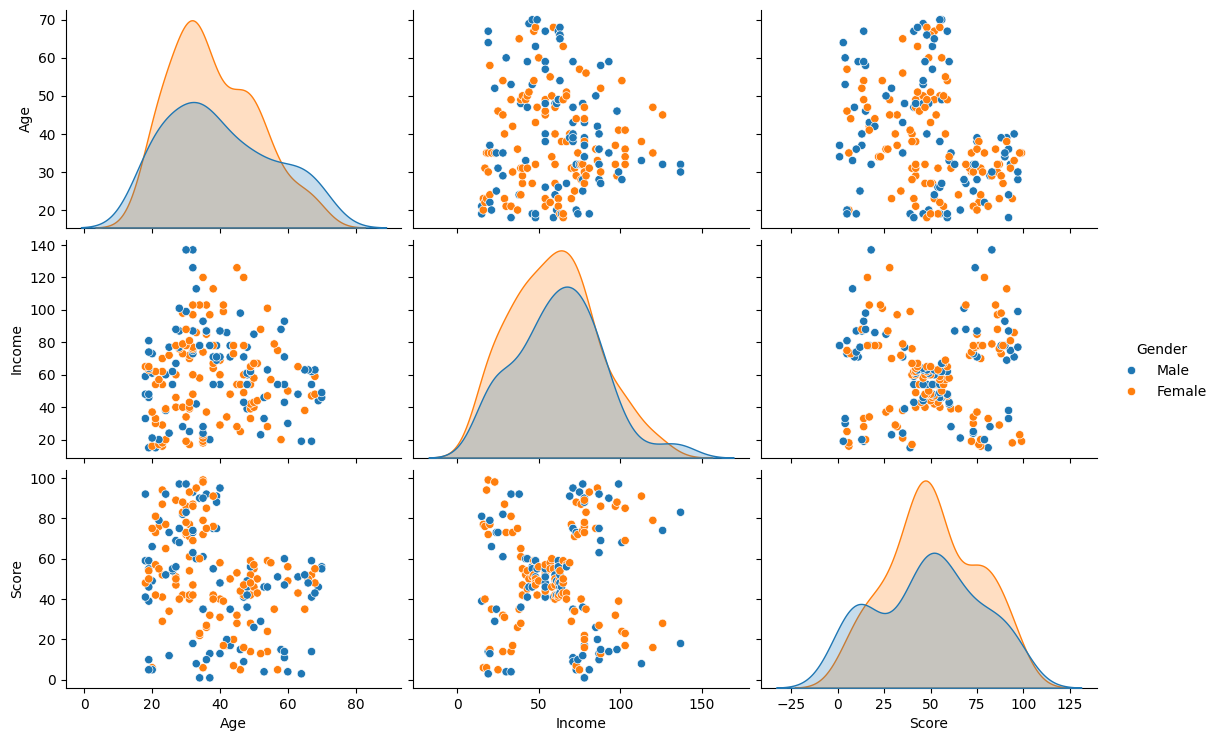

In [10]:
sns.pairplot(df_eda, hue='Gender', aspect=1.5)
plt.show()

### **Hasil Analisis**
- Data jenis kelamin (gender) memiliki distribusi yang sama
  
  ==> Menandakan jenis kelamin tidak berpengaruh terhadap skor
  
  ==> Kolom ini dapat dihapus

## **Clustering**

### **Feature Selection**

In [11]:
X = df_eda.drop(['Gender'], axis=1)
X.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### **Visualisasi Dendrogram Hasil Clustering**

#### Single Linkage

In [12]:
# Menghitung Distance matrix
dist = distance_matrix(X, X)
Z = sch.linkage(dist, 'single')

<ipython-input-12-bf4717f7c9da>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(dist, 'single')


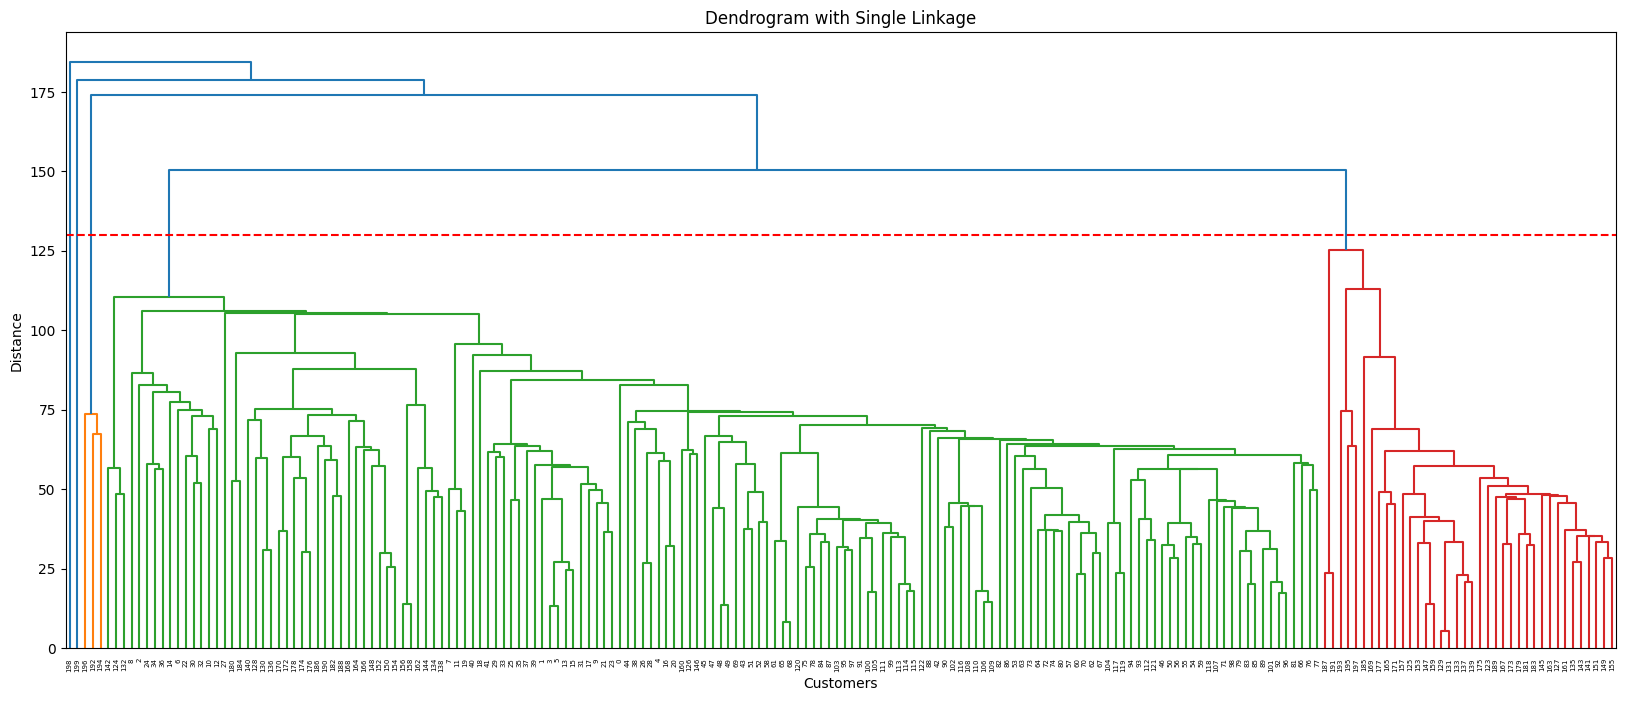

In [13]:
# Plot dendrogram AHC dengan Single Linkage
plt.figure(figsize=(20, 8))
dn = sch.dendrogram(Z)
plt.title('Dendrogram with Single Linkage')
plt.axhline(y=130, color='r', linestyle='--')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

#### Average Linkage

In [14]:
# Menghitung Distance matrix
dist = distance_matrix(X, X)
Z = sch.linkage(dist, 'average')

<ipython-input-14-ce7da5b02e16>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(dist, 'average')


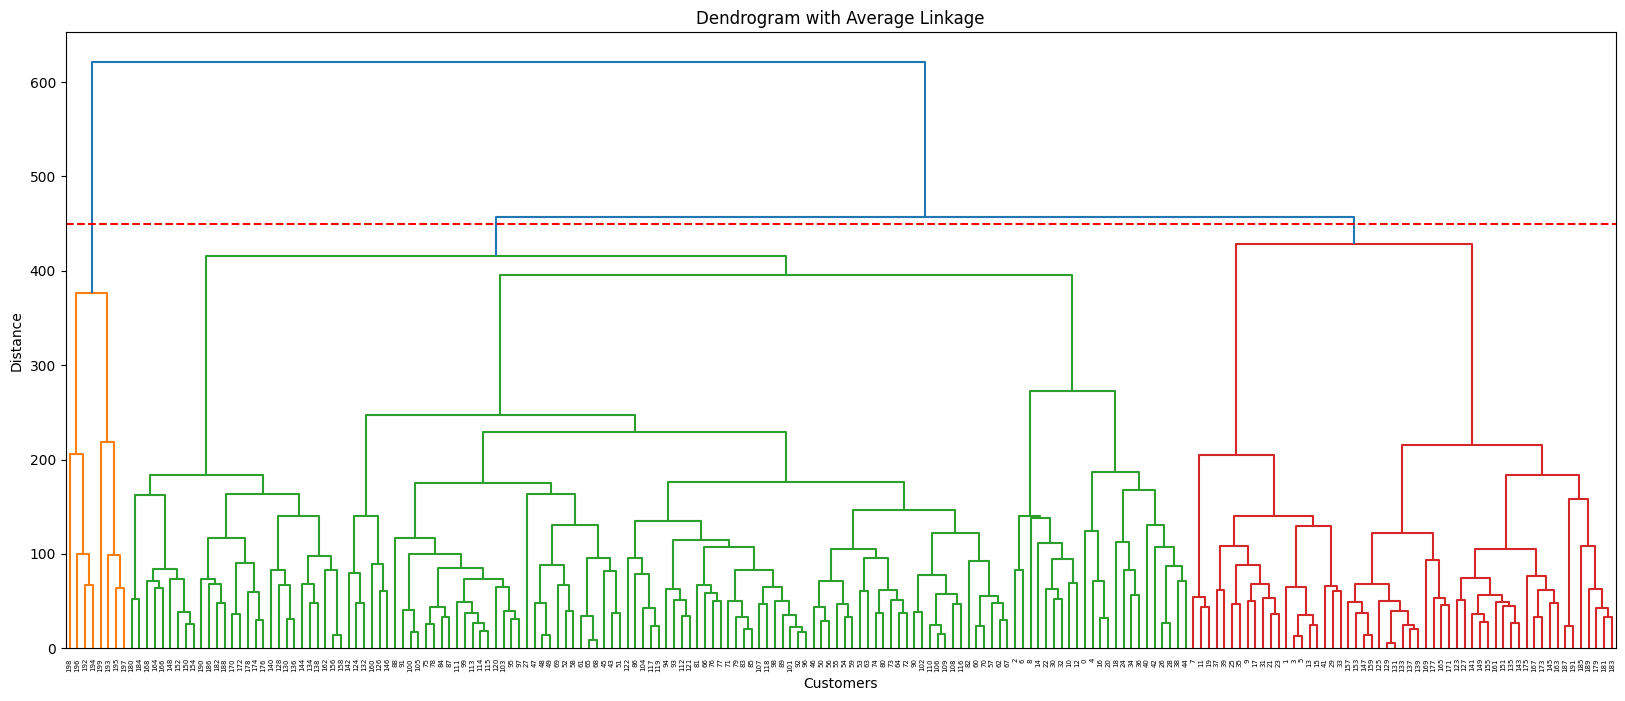

In [15]:
# Plot dendrogram AHC dengan Average Linkage
plt.figure(figsize=(20, 8))
dn = sch.dendrogram(Z)
plt.title('Dendrogram with Average Linkage')
plt.axhline(y=450, color='r', linestyle='--')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

#### Complete Linkage

In [16]:
# Menghitung Distance matrix
dist = distance_matrix(X, X)
Z = sch.linkage(dist, 'complete')

<ipython-input-16-d7691e3c2ca8>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(dist, 'complete')


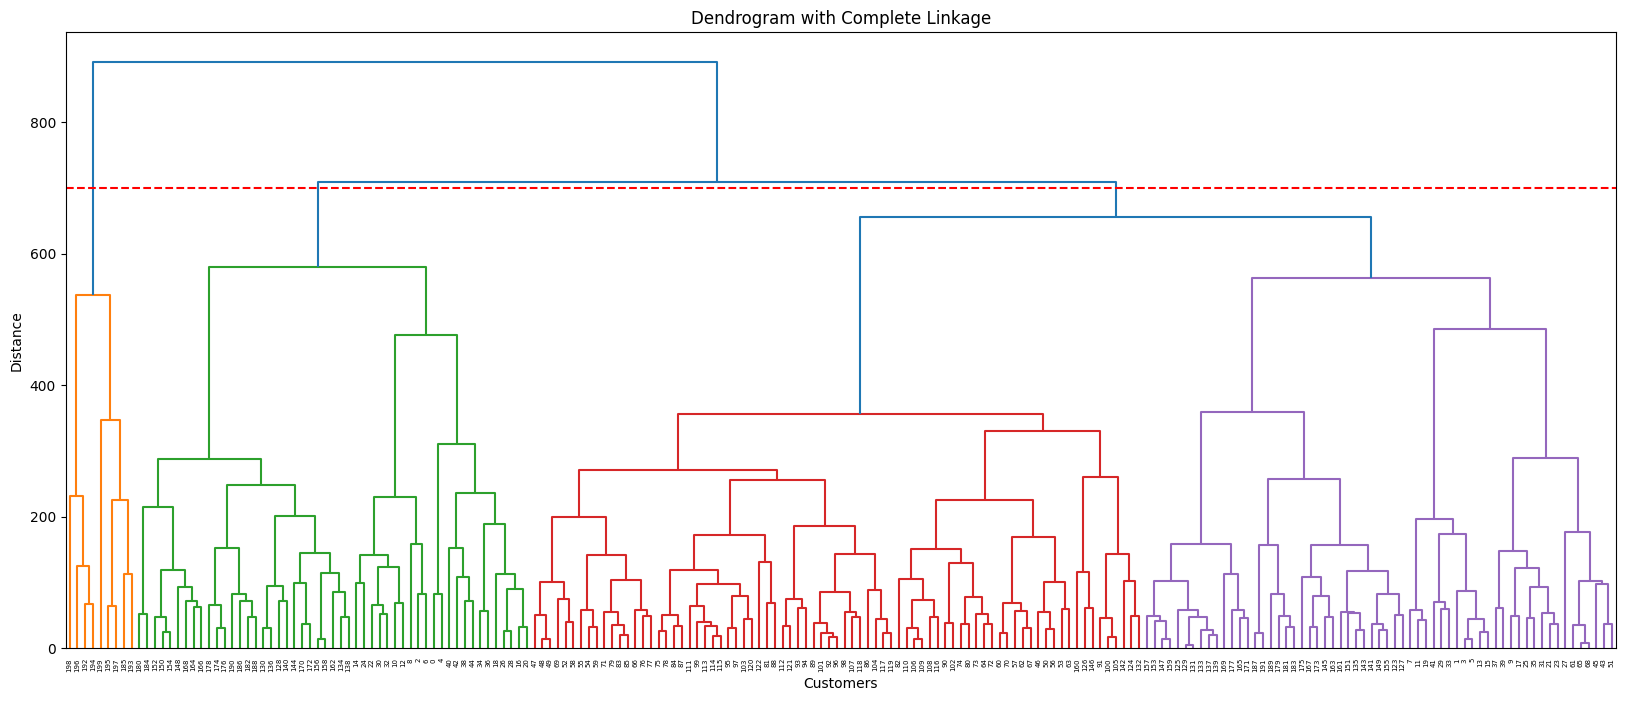

In [17]:
# Plot dendrogram AHC dengan Complete Linkage
plt.figure(figsize=(20, 8))
dn = sch.dendrogram(Z)
plt.title('Dendrogram with Complete Linkage')
plt.axhline(y=700, color='r', linestyle='--')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

### **Proses Clustering**

*Agglomerative Clustering* akan membutuhkan dua input:

- **n_clusters**: Jumlah kluster yang akan dibentuk serta jumlah centroid yang akan dihasilkan.
- **linkage**: Kriteria penghubung yang akan digunakan. Kriteria penghubung menentukan jarak yang akan digunakan antara kumpulan observasi. Algoritma akan menggabungkan pasangan kluster yang meminimalkan kriteria ini.

### Pencarian n_cluster yang optimal

----

Sebuah ***n_cluster*** dapat ditentukan menggunakan berbagai metode, seperti :
- Elbow Method,
- Silhouette Method,
- Gap Statistic, etc

Dalam AHC, proses pencarian ***n_cluster*** dapat dilakukan menggunakan dendrogram seperti contoh di atas, dan dari hasil plotting tersebut sebuah garis horizontal dapat dibuat yang akan membagi berapa banyak kluster yang ada dalam dataset

Pada contoh implementasi kali ini, **Silhouette method** juga akan ikut digunakan untuk mencari nilai optimal dari ***n_cluster*** dari dataset yang ada

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
limit = int((X.shape[0]//2)**0.5)
N = range(2, limit+1)

### Average Linkage

#### Silhouette Method

In [20]:
silhouette_scores = []
best_silhouette_score = 0
optimal_n = None
linkage='average'
for n in N:
    ahc = AgglomerativeClustering(n_clusters=n, linkage=linkage)
    labels = ahc.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    if score > best_silhouette_score:
      best_silhouette_score = score
      optimal_n = n

<ipython-input-21-b298c2ad2780>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(N, silhouette_scores, 'bo-', marker='o')


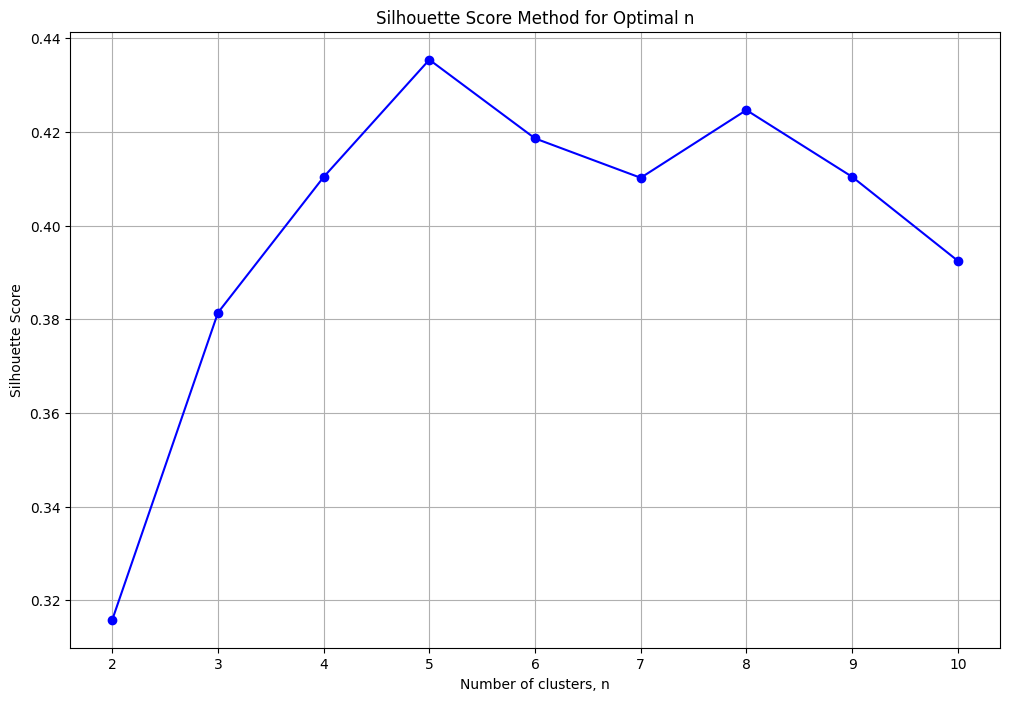

In [21]:
# Plot the silhouette scores to find the optimal number of clusters
plt.figure(figsize=(12, 8))
plt.plot(N, silhouette_scores, 'bo-', marker='o')
plt.xlabel('Number of clusters, n')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal n')
plt.xticks(N)
plt.grid(True)
plt.show()

##### Hasil Analisis
- Terlihat bahwa n = 5 memiliki nilai silhoette yang paling tinggi

  ==> Hal ini menandakan n=5 adalah jumlah kluster yang paling optimal

#### Clustering

In [22]:
print("Optimal n_cluster = ", optimal_n)

Optimal n_cluster =  5


In [23]:
ahc = AgglomerativeClustering(
    n_clusters=optimal_n,
    linkage=linkage
)

cluster = ahc.fit(X)

#### Visualisasi dengan Scatterplot

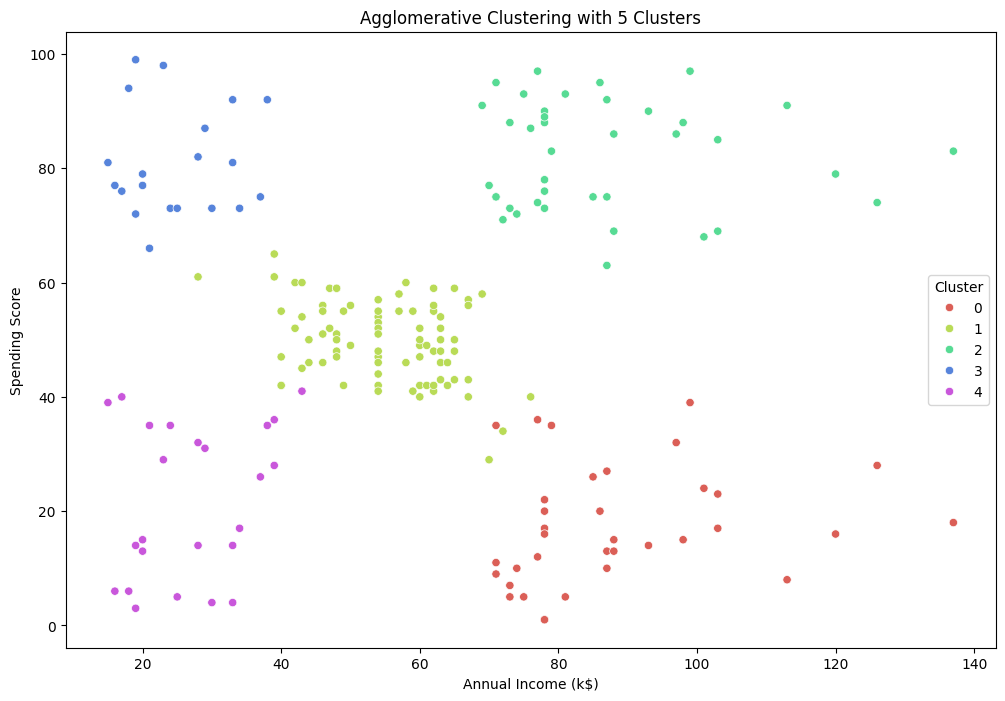

In [24]:
X['Labels'] = cluster.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative Clustering with 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

### Complete Linkage

#### Silhouette Method

In [25]:
silhouette_scores = []
best_silhouette_score = 0
optimal_n = None
linkage='complete'
for n in N:
    ahc = AgglomerativeClustering(n_clusters=n, linkage=linkage)
    labels = ahc.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    if score > best_silhouette_score:
      best_silhouette_score = score
      optimal_n = n

<ipython-input-26-b298c2ad2780>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(N, silhouette_scores, 'bo-', marker='o')


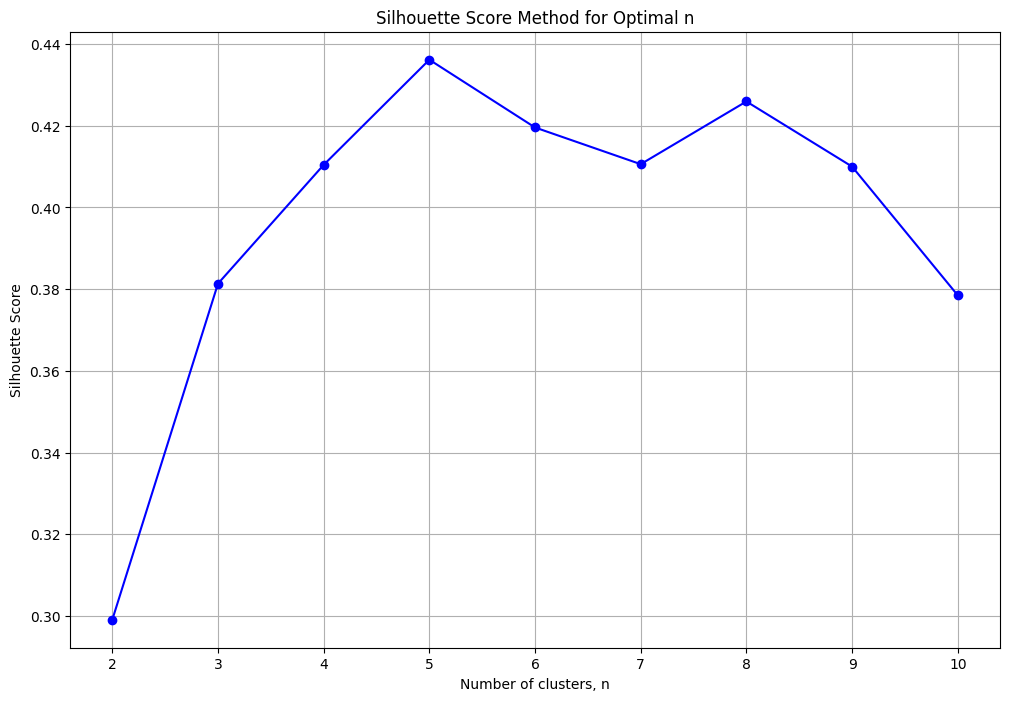

In [26]:
# Plot the silhouette scores to find the optimal number of clusters
plt.figure(figsize=(12, 8))
plt.plot(N, silhouette_scores, 'bo-', marker='o')
plt.xlabel('Number of clusters, n')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal n')
plt.xticks(N)
plt.grid(True)
plt.show()

##### Hasil Analisis
- Terlihat bahwa n = 5 memiliki nilai silhoette yang paling tinggi

  ==> Hal ini menandakan n=5 adalah jumlah kluster yang paling optimal

#### Clustering

In [27]:
print("Optimal n_cluster = ", optimal_n)

Optimal n_cluster =  5


In [28]:
# Jumlah kluster = 5
ahc = AgglomerativeClustering(
    n_clusters=optimal_n,
    linkage=linkage
)

cluster = ahc.fit(X)

#### Visualisasi dengan Scatterplot

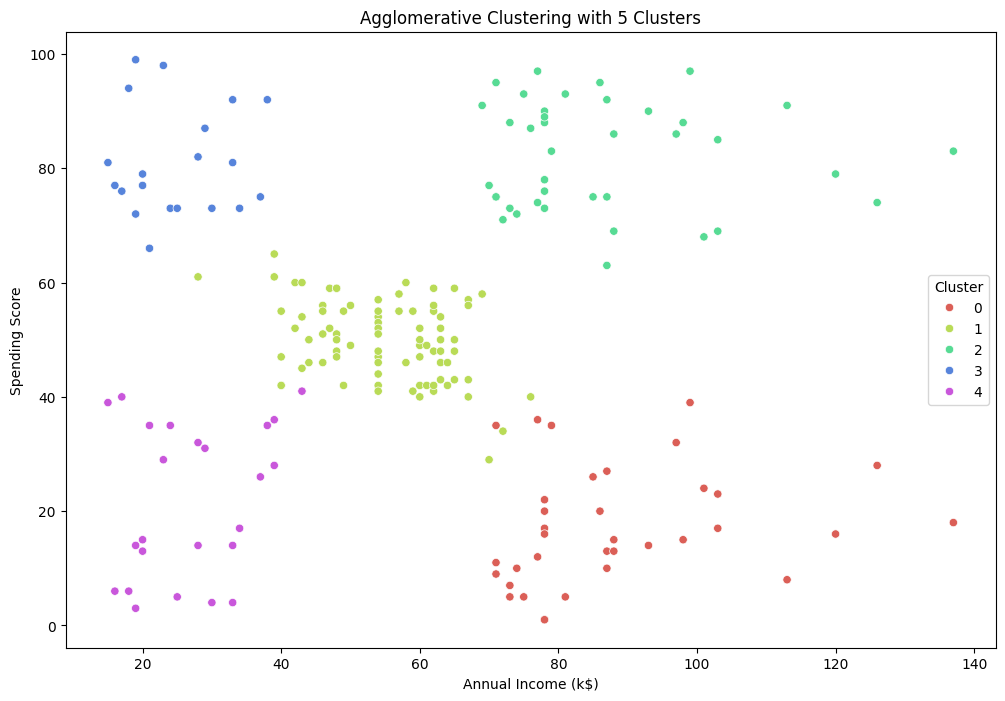

In [29]:
X['Labels'] = cluster.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative Clustering with 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

### Single Linkage

#### Silhouette Method

In [30]:
silhouette_scores = []
best_silhouette_score = 0
optimal_n = None
linkage='single'
for n in N:
    ahc = AgglomerativeClustering(n_clusters=n, linkage=linkage)
    labels = ahc.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    if score > best_silhouette_score:
      best_silhouette_score = score
      optimal_n = n

<ipython-input-31-b298c2ad2780>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(N, silhouette_scores, 'bo-', marker='o')


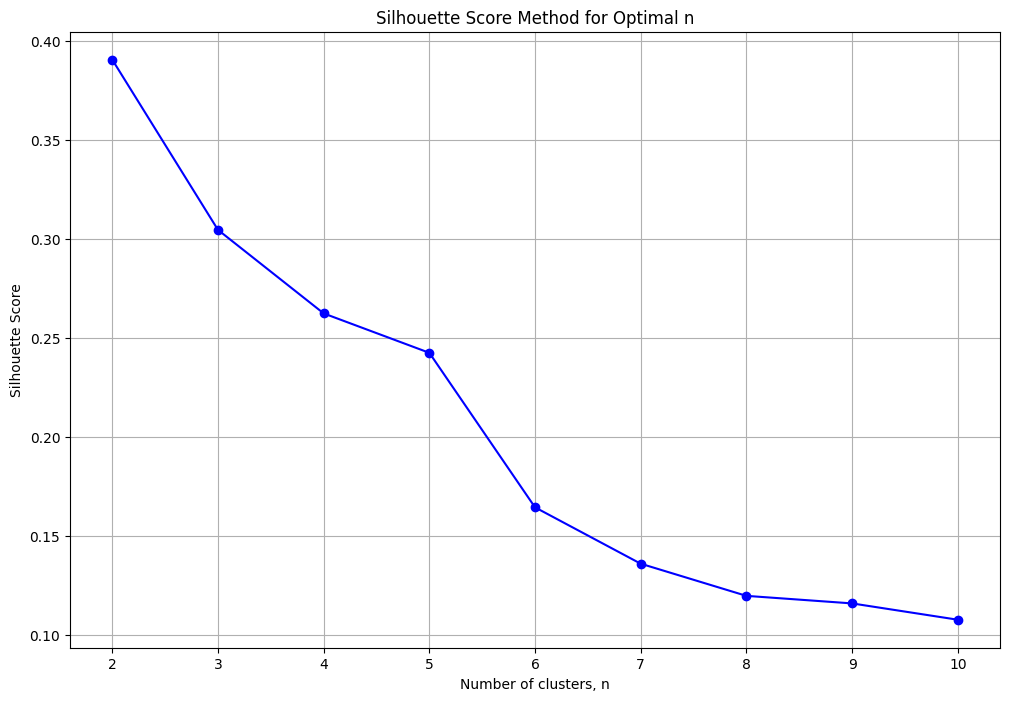

In [31]:
# Plot the silhouette scores to find the optimal number of clusters
plt.figure(figsize=(12, 8))
plt.plot(N, silhouette_scores, 'bo-', marker='o')
plt.xlabel('Number of clusters, n')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal n')
plt.xticks(N)
plt.grid(True)
plt.show()

##### Hasil Analisis
- Terlihat bahwa n = 2 memiliki nilai silhoette yang paling tinggi

  ==> Hal ini menandakan n=2 adalah jumlah kluster yang paling optimal

#### Clustering

In [32]:
print("Optimal n_cluster = ", optimal_n)

Optimal n_cluster =  2


In [33]:
ahc = AgglomerativeClustering(
    n_clusters=optimal_n,
    linkage=linkage
)

cluster = ahc.fit(X)

#### Visualisasi dengan Scatterplot

<ipython-input-34-cdec70e790df>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],


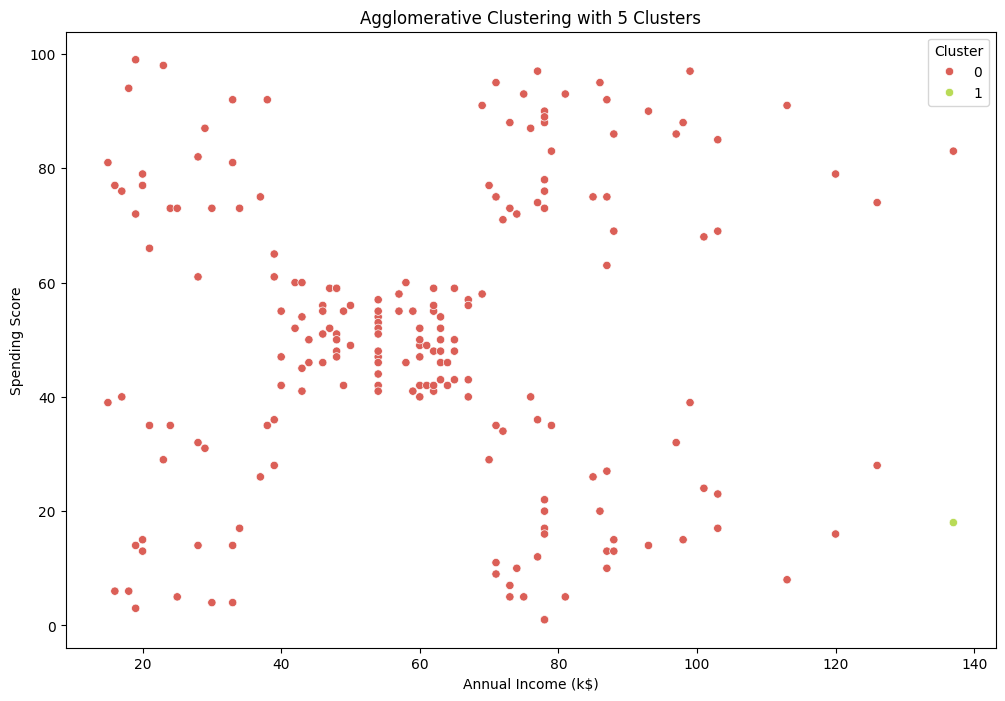

In [34]:
X['Labels'] = cluster.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative Clustering with 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()